## PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import glob
from PIL import Image

In [ ]:
file = '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00001.jpg'
if os.path.exists(file):
    img = cv2.imread(file)
    if img is not None:
        shape_img = img.shape
        print("Shape :", shape_img)
    else:
        print("Image cannot be read with cv2.imread()")
else:
    print("Not Found")

Shape : (1008, 756, 3)


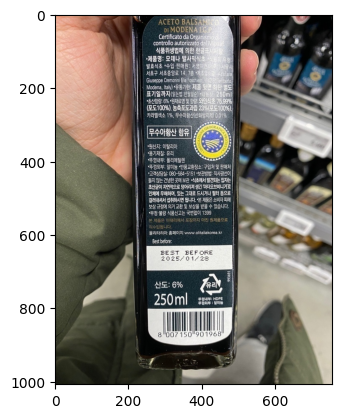

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00001.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

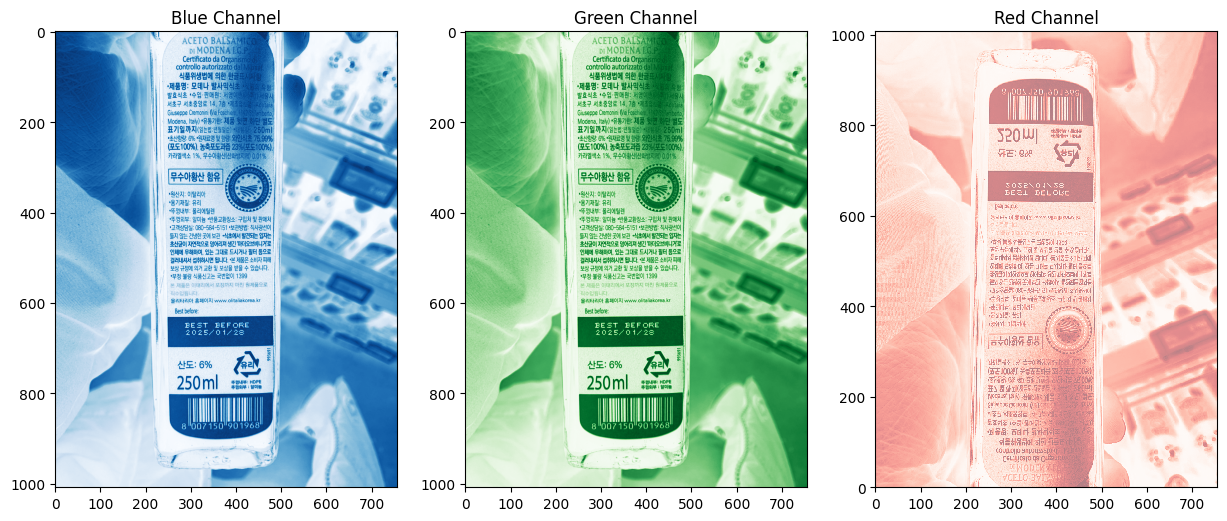

In [ ]:
# Memisahkan saluran warna
blue, green, red = cv2.split(img)

# Menyesuaikan ukuran plot dan menambahkan subplots
fig = plt.figure(figsize=(15, 7.2))

# Blue Channel plot with 'Blues' colormap
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue, cmap='Blues')
plt.axis('on')

# Plot Green Channel with colormap 'Greens' and set the color inverse
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green, cmap='Greens')
plt.axis('on')

# Plot Red Channel dengan colormap 'Reds' dan mengatur warna latar belakang
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red, cmap='Reds', interpolation='none', origin='lower', extent=[0, img.shape[1], 0, img.shape[0]], alpha=0.5)
plt.axis('on')

# Menampilkan plot
plt.show()

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
display(blue_temp_df)

,0,1,2,3,4,5,6,7,8,9,...,746,747,748,749,750,751,752,753,754,755
0,244,243,242,238,236,234,235,236,238,238,...,4,3,5,9,7,10,9,10,5,4
1,238,239,241,238,234,231,232,233,230,232,...,5,5,6,9,7,8,7,8,5,11
2,235,235,236,239,239,236,232,229,228,230,...,6,7,7,9,7,8,9,9,5,11
3,238,238,240,243,246,245,242,238,231,229,...,6,7,8,9,9,9,13,13,6,10
4,240,242,245,246,247,247,249,250,238,232,...,4,6,7,8,11,12,13,14,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,25,30,27,25,23,26,23,24,25,25,...,215,215,214,214,215,216,217,216,214,214
1004,26,31,26,25,24,28,24,25,24,24,...,217,216,214,214,215,216,217,217,217,217
1005,25,29,25,25,24,28,24,25,26,24,...,220,219,216,216,217,218,218,218,219,219
1006,22,25,24,24,23,24,22,22,26,25,...,220,219,218,218,218,218,218,218,219,219


In [ ]:
#normalizing the pixel values of the blue, green, and red channels of an image.
df_blue = blue/255
df_green = green/255
df_red = red/255
#applying Principal Component Analysis (PCA) to reduce the dimensionality of the blue, green, and red channels of an image.
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9236252038526426
Green Channel: 0.9073620854042482
Red Channel  : 0.903779695928958


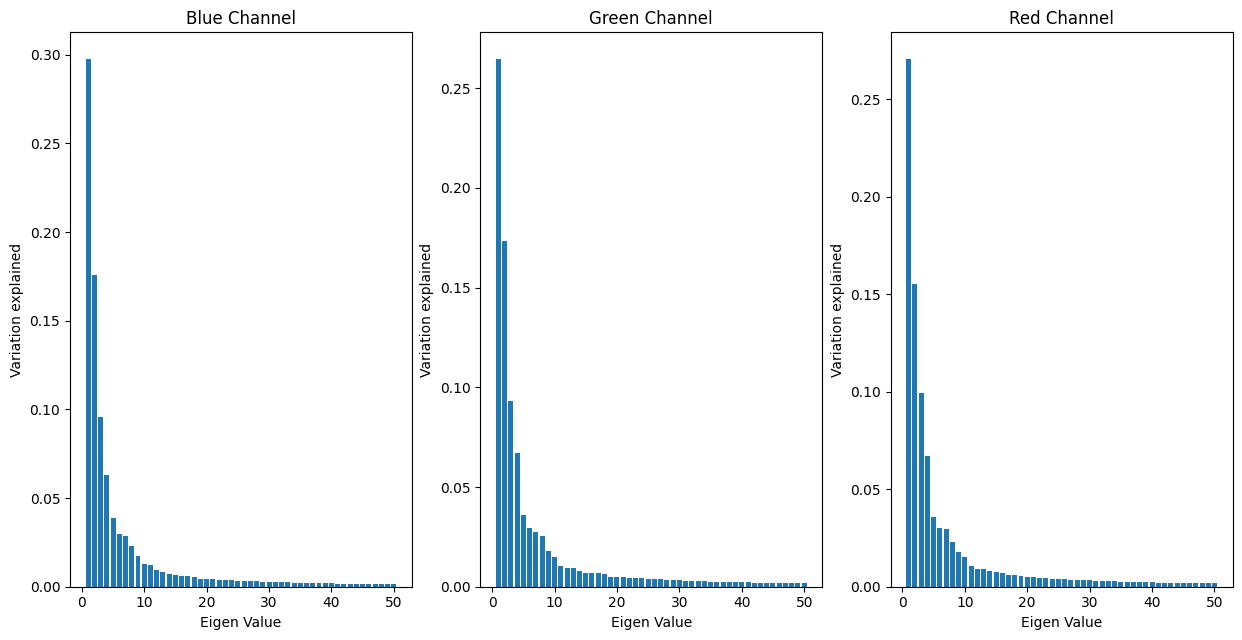

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [ ]:
# Varying the number of principal components
pca_b = PCA(n_components=30)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=30)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=30)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

# Reconstructing the image with reduced components
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))

# Displaying the shapes of the arrays
print("Shape :", b_arr.shape, g_arr.shape, r_arr.shape)
print("Reduce Shape :", img_reduced.shape)

Shape : (1008, 756) (1008, 756) (1008, 756)
Reduce Shape : (1008, 756, 3)


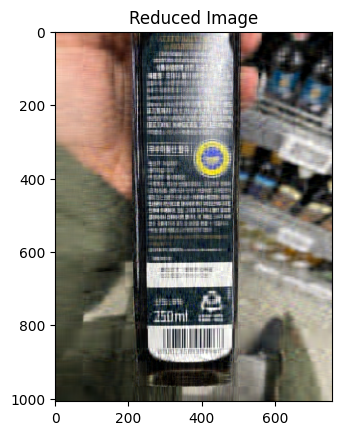

In [ ]:
DESTINATION_PATH  = '/content/drive/MyDrive/Bangkit/Data/sample/'

base_filename = os.path.basename('/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00001.jpg')
title, ext = os.path.splitext(base_filename)

final_filepath = os.path.join(DESTINATION_PATH,'tp_'+ title + ext)

plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

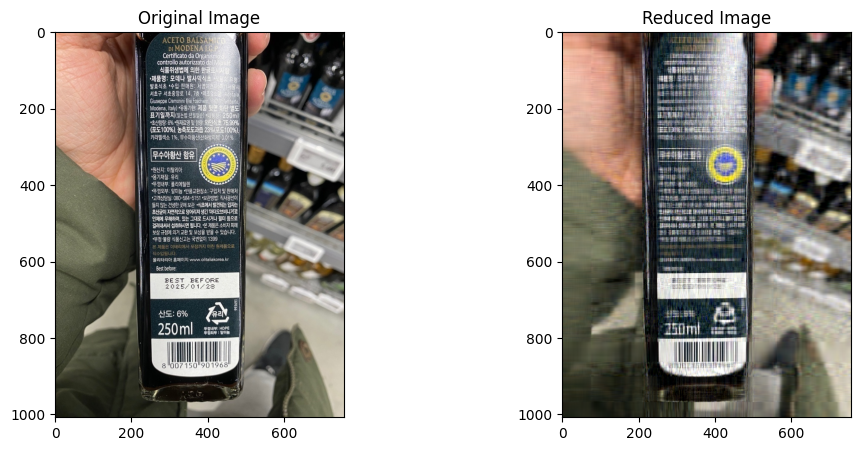

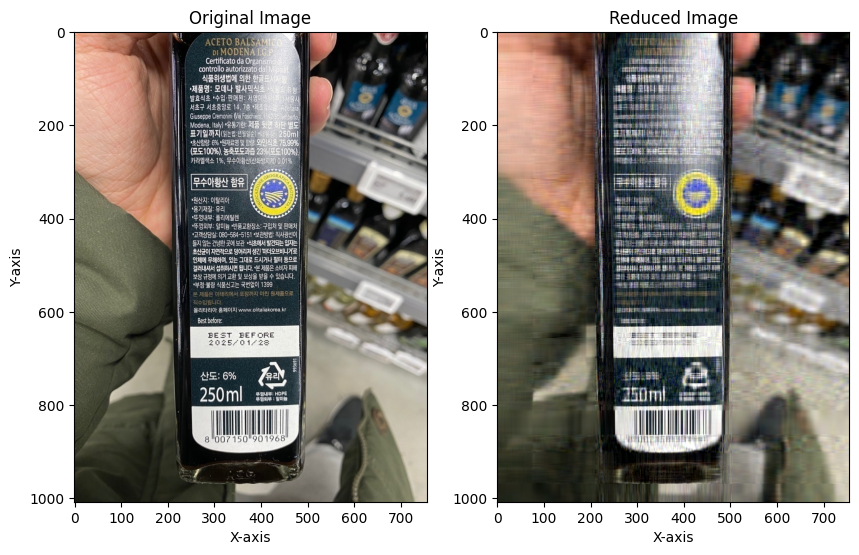

In [ ]:
# Variations: Resize the image
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

# Variations: Added axis titles and axis markers
fig = plt.figure(figsize=(10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.imshow(img_reduced)
plt.show()

In [ ]:
files = glob.glob('/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images*.jpg')
DESTINATION_PATH  = '/content/drive/MyDrive/Bangkit/pca_products_real'

In [ ]:
for f in files:
    print(f)
    base_filename = os.path.basename(f)
    title, ext = os.path.splitext(base_filename)

    img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    blue,green,red = cv2.split(img)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    pca_b = PCA(n_components=50)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g = PCA(n_components=50)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r = PCA(n_components=50)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)

    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
    img_new = img_reduced*255

    final_filepath = os.path.join(DESTINATION_PATH, title + ext)
    cv2.imwrite(final_filepath, img_new)

## VGG BOUNDING BOX


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import json

In [ ]:
# define the base path to the input dataset and then use it to derive
# the path to the images directory and annotation CSV file
BASE_PATH = "/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "images"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "annotations.json"])

# define the path to the base output directory
BASE_OUTPUT = "/content/output"
# define the path to the output serialized model, model training plot,
# and testing image filenames
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])

# initialize our initial learning rate, number of epochs to train
# for, and the batch size
INIT_LR = 4e-4
NUM_EPOCHS = 30
BATCH_SIZE = 16


In [ ]:
# load the contents of the CSV annotations file
print("[INFO] loading dataset...")
json_data = json.load(open(ANNOTS_PATH))

data = []
targets = []
filenames = []

[INFO] loading dataset...


In [ ]:
'''
Multiple annotations are present in the diff row
'''
for key, value in list(json_data.items()):
  filename = key
  bboxes = []
  imagePath = os.path.sep.join([IMAGES_PATH, filename])
  if not os.path.exists(imagePath):
    break

  image = cv2.imread(imagePath)
  (h, w) = image.shape[:2]
  image = cv2.resize(image,(224, 224))
  image = img_to_array(image)
  for ann in value['ann']:
    if ann['cls'] == 'date':
      startX, startY, endX, endY = ann['bbox']
      startX = float(startX) / w
      startY = float(startY) / h
      endX = float(endX) / w
      endY = float(endY) / h
      print(startX, startY, endX, endY)
      bboxes.append([startX, startY, endX, endY])
      data.append(image)
      targets.append((startX, startY, endX, endY))
      filenames.append(filename)

In [ ]:
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")
# partition the data into training and testing splits using 90% of
# the data for training and the remaining 10% for testing
split = train_test_split(data, targets, filenames, test_size=0.10,
	random_state=42)
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]
# write the testing filenames to disk so that we can use then
# when evaluating/testing our bounding box regressor
print("[INFO] saving testing filenames...")
f = open("/content/drive/MyDrive/Bangkit/output/output/test_images.txt", "w")
f.write("\n".join(testFilenames))
f.close()

[INFO] saving testing filenames...


In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(256, activation="relu")(flatten)
bboxHead = Dense(128, activation="relu")(bboxHead)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr=INIT_LR)
model.compile(loss="mse", optimizer=opt, metrics=[
        'MeanSquaredError',
        'accuracy',
    ])
print(model.summary())
# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=BATCH_SIZE,
	epochs=NUM_EPOCHS,
	verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[INFO] saving object detector model...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


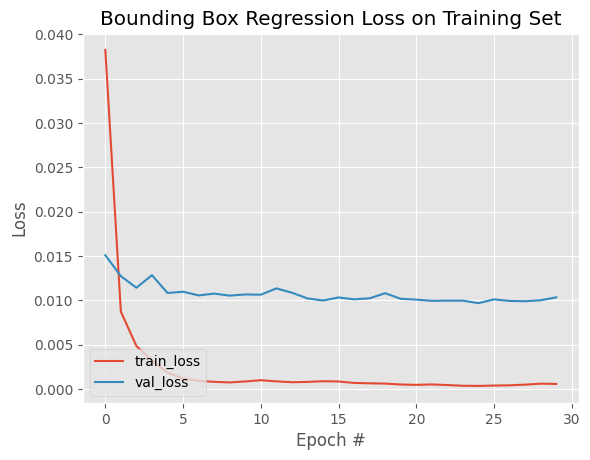

In [ ]:
# serialize the model to disk
print("[INFO] saving object detector model...")
model.save(MODEL_PATH, save_format="h5")
# plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(PLOT_PATH)

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

In [ ]:
# test_image = '/content/drive/MyDrive/ML_Project/Data/BoundingBoxTraining/images/img_00010.jpg'
test_image = '/content/drive/MyDrive/Bangkit/output/output/test_images.txt'

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--input", required=False,
	help="path to input image/text file of image filenames", default=test_image)
# args = vars(ap.parse_args())
args = ap.parse_args(args=[])
print(args.input)

/content/drive/MyDrive/Bangkit/output/output/test_images.txt


In [ ]:
# determine the input file type, but assume that we're working with
# single input image
filetype = mimetypes.guess_type(args.input)[0]
print(filetype)
imagePaths = [args.input]
# if the file type is a text file, then we need to process *multiple*
# images
if "text/plain" == filetype:
	# load the filenames in our testing file and initialize our list
	# of image paths
	filenames = open(args.input).read().strip().split("\n")
	imagePaths = []
	# loop over the filenames
	for f in filenames:
		# construct the full path to the image filename and then
		# update our image paths list
		p = os.path.sep.join([IMAGES_PATH, f])
		imagePaths.append(p)
print(imagePaths)


text/plain
['/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00676.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_01015.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00589.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00372.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00640.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00597.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00169.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00471.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00456.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00880.jpg', '/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00960.jpg', '/content

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print("[INFO] loading object detector...")
model = load_model(MODEL_PATH)
# loop over the images that we'll be testing using our bounding box
# regression model
for imagePath in imagePaths:
  image = cv2.imread(imagePath)
  (h, w) = image.shape[:2]
  image = cv2.resize(image,(224, 224))
  image = img_to_array(image) / 255.0
  image = np.expand_dims(image, axis=0)
  # make bounding box predictions on the input image
  preds = model.predict(image)[0]
  (startX, startY, endX, endY) = preds
  # load the input image (in OpenCV format), resize it such that it
  # fits on our screen, and grab its dimensions
  image = cv2.imread(imagePath)
  image = imutils.resize(image, width=600)
  (h, w) = image.shape[:2]
  print(h,w)
  # scale the predicted bounding box coordinates based on the image
  # dimensions
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)
  # show the output image
  cv2_imshow(image)
  # show the output image
  print(image.shape)
  bb = image[startY-10:endY+10, startX-10: endX+10]
  # cv2.imwrite('/content/output/test.png', bb)
  cv2_imshow(bb)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import re
import numpy as np
import keras

In [ ]:
img_path = '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00011.jpg'
img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
annotation_path = '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/annotations.json'

In [ ]:
print("[INFO] Evaluating model...")
test_loss, test_mean_squared_error, test_accuracy = model.evaluate(testImages, testTargets, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

[INFO] Evaluating model...
Test Accuracy: 90.40%


In [ ]:
import json

def show_image_with_bounding_box(image_path, annotation_path):
  img = cv2.imread(image_path)
  json_data = json.load(open(annotation_path))
  filename = image_path.split('/')[-1]
  data = json_data[filename]['ann']
  # plt.imshow(img)
  for a in data:
    bbox = a['bbox']
    cls = a['cls']
    x1 = int(bbox[0])
    y1 = int(bbox[1])
    x2 = int(bbox[2])
    y2 = int(bbox[3])
    if cls == 'date':
      cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)

  scale_percent = 220 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)

  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  plt.figure(figsize=(10, 10))
  plt.imshow(resized)

In [ ]:
ROOT = '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images'
all_images = []
for path in os.listdir(ROOT):
  if os.path.isfile(os.path.join(ROOT, path)):
    all_images.append(os.path.join(ROOT, path))
print(all_images)

['/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00028.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00113.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00105.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00116.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00136.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00080.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00055.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00124.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00141.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00043.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00117.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00042.jpg', '/content/drive/MyDrive/Bangkit/Date-Real/Date-Real/images/img_00161.jpg', '/content/drive/MyDrive/

In [ ]:
for img_path in all_images:
  show_image_with_bounding_box(img_path, annotation_path)

In [43]:
import cv2
import imutils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [45]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 227ms/step


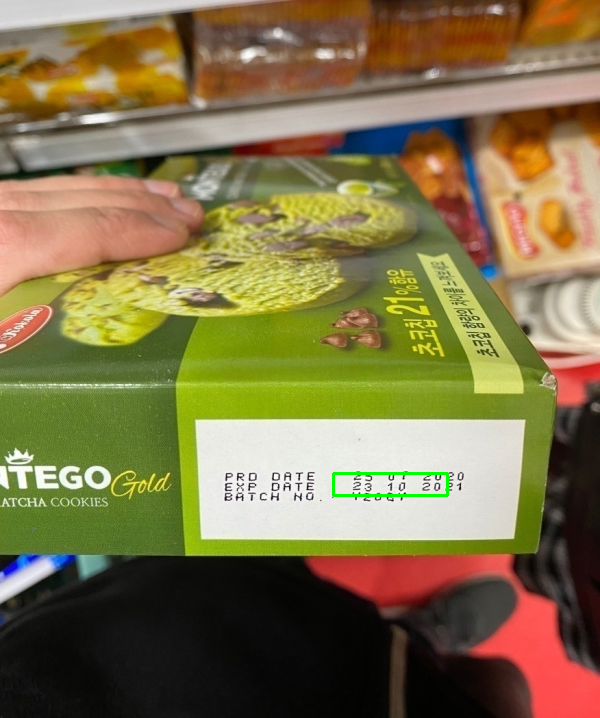

In [50]:
import cv2
import imutils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Path to the saved object detection model
MODEL_PATH = "/content/output/detector.h5"

# Load the object detection model
model = load_model(MODEL_PATH)

# Path to the test image
test_image_path = "/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00010.jpg"
# Load the test image
image = cv2.imread(test_image_path)
image = imutils.resize(image, width=600)  # Resize for better visualization

# Preprocess the image for the object detection model
input_image = cv2.resize(image, (224, 224))
input_image = img_to_array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

# Make bounding box predictions on the input image
preds = model.predict(input_image)[0]
(startX, startY, endX, endY) = preds

# Scale the predicted bounding box coordinates based on the image dimensions
(h, w) = image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)

# Draw the bounding box on the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

# Display the output image with the bounding box
cv2_imshow(image)


In [57]:
import cv2
import imutils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Path to the saved object detection model
MODEL_PATH = "/content/output/detector.h5"

# Load the object detection model
model = load_model(MODEL_PATH)

# Path to the test image
test_image_path = "/content/drive/MyDrive/Bangkit/Products-Real/Products-Real/train/images/img_00010.jpg"

# Load the test image
image = cv2.imread(test_image_path)
image = imutils.resize(image, width=600)  # Resize for better visualization

# Preprocess the image for the object detection model
input_image = cv2.resize(image, (224, 224))
input_image = img_to_array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

# Make bounding box predictions on the input image
preds = model.predict(input_image)[0]
(startX, startY, endX, endY) = preds

# Scale the predicted bounding box coordinates based on the image dimensions
(h, w) = image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)

# Crop the region of interest (ROI) using the bounding box
cropped_image = image[startY:endY, startX:endX]

# Display the cropped image
cv2_imshow(cropped_image)


1/1 [==============================] - 0s 154ms/step
